In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
data = pd.read_csv('young-people-survey/responses.csv', engine='python')

In [4]:
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

## Preprocessing

In [5]:
data = data.fillna(data.median(axis=0), axis=0)

In [6]:
data_described = data.describe(include=[object])

In [7]:
data_described

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


In [8]:
cat_columns = [c for c in data.columns if data[c].dtype.name == 'object']
cat_columns

['Smoking',
 'Alcohol',
 'Punctuality',
 'Lying',
 'Internet usage',
 'Gender',
 'Left - right handed',
 'Education',
 'Only child',
 'Village - town',
 'House - block of flats']

In [9]:
for c in cat_columns:
    data[c] = data[c].fillna(data_described[c]['top'])

In [10]:
numeric_columns = [c for c in data.columns if c not in cat_columns]

In [11]:
binary_cols = [c for c in cat_columns if data_described[c]['unique'] == 2]
nonbinary_cols = [c for c in cat_columns if c not in binary_cols]

In [12]:
for b in binary_cols:
    firstUniqueVal = data[b].unique()[0]
    secUniqueVal = data[b].unique()[1]
    data.at[data[b] == firstUniqueVal, b] = 0
    data.at[data[b] == secUniqueVal, b] = 1

In [13]:
data_nonbinary = pd.get_dummies(data[nonbinary_cols])
data_nonbinary.head()

,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Punctuality_i am always on time,Punctuality_i am often early,Punctuality_i am often running late,Lying_everytime it suits me,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Internet usage_few hours a day,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all,Education_college/bachelor degree,Education_currently a primary school pupil,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school
0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [14]:
data_numerical = data[numeric_columns]
data_numerical.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000
mean,4.732673,3.327723,3.112871,2.287129,2.122772,2.956436,2.762376,3.473267,3.763366,2.360396,2.452475,2.910891,2.771287,2.761386,3.140594,2.829703,2.843564,2.336634,2.139604,4.615842,2.794059,3.384158,4.496040,3.491089,3.112871,3.155446,3.750495,3.789109,3.646535,2.125743,3.537624,3.206931,3.137624,2.59505,2.333663,2.064356,4.175248,3.135644,2.640594,2.661386,2.163366,3.158416,3.082178,3.779208,2.513861,2.256436,2.688119,2.586139,2.272277,3.689109,2.460396,2.323762,1.89604,3.382178,3.290099,1.900990,2.361386,3.276238,3.232673,3.024752,4.559406,2.948515,3.337624,2.061386,

In [15]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [16]:
data_numerical.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1010.000000,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1010.000000,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03
mean,3.464775e-16,1.758769e-16,-9.849107e-17,1.793945e-16,-1.301489e-16,8.793846e-18,1.582892e-16,1.231138e-17,1.688418e-16,7.738584e-17,-5.803938e-17,4.221046e-17,1.899471e-16,1.618068e-16,-1.134406e-16,1.195963e-16,1.072849e-16,5.628061e-17,-1.090437e-16,4.959729e-16,7.914461e-17,1.292695e-16,-3.165784e-17,1.758769e-17,-8.442092e-17,-1.125612e-16,1.758769e-16,1.195963e-16,-1.125612e-16,-9.849107e-17,-2.110523e-17,-1.407015e-16,-7.0

## Cоединяем все в одну таблицу

In [17]:
dataset = pd.concat((data_numerical, data_nonbinary, data[binary_cols]), axis = 1)
print(dataset.shape)

(1010, 168)


In [18]:
dataset.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Punctuality_i am always on time,Punctuality_i am often early,Punctuality_i am often running late,Lying_everytime it suits me,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Internet usage_few hours a day,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all,Education_college/bachelor degree,Education_currently a primary school pupil,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Gender,Left - right handed,Only child,Village - town,House - block of flats
0,0.403073,-0.393315,-0.952583,-1.132765,-0.114366,-0.766238,-1.399112,1.316116,1.046687,-0.992198,-1.120246,-1.391805,-1.463433,-1.404249,-0.114024,-1.362839,-1.393788,-1.012756,-0.962897,0.554127,0.855454,-1.155860,0.646837,0.421281,0.676887,-1.600245,1.058830,0.994428,-0.572506,-0.990621,-1.244992,-1.748336,1.483652,-1.232698,0.493361,0.763618,0.897541,-0.102926,1.754576,0.245203,0.609997,-0.106211,-0.064377,1.072316,0.352939,-1.011579,-1.17385,-1.202673,-0.965484,1.099462,0.372537,0.447207,0.080855,-1.707246,1.138993,2.640254,-1.072723,0.563266,0.599987,-0.776261,0.598434,0.741070,0.429314,-0.877500,-0.836389,-0.997533,-1.247225,-1.186256,1.313991,0.423310,-1.140197,-0.031164,-0.662213,1.035109,-0.963837,-0.531693,1.363191,0.787966,-1.244335,1.708153,0.150887,0.014323,-1.265528,-0.69564,1.515886,-1.080584,-1.066631,-0.164371,0.370817,-2.168309,-1.017946,-0.785889,-0.761233,-1.011743,0.784246,0.867713,-0.016948,0.099780,-1.395090,-2.093844,-1.528809,-1.553712,1.029016,-0.100950,-0.325546,0.326219,0.454845,-0.246877,0.425383,-0.144356,1.108981,-0.060153,1.230842,-2.285853,-1.719882,-0.446249,1.165839,1.378340,-1.480172,0.356144,1.365089,-1.617172,1.103498,0.102900,-1.219653,-0.472458,0.849351,0.227841,-0.020796,0.579771,1.493842,-0.169293,-0.088021,-1.455518,-0.510976,-0.152769,-1.058343,-1.339390,-0.292937,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-1.104718,0.806831,-0.952583,-1.132765,-1.045898,-1.567377,-0.605234,-0.407979,1.046687,1.195837,1.193554,-1.391805,0.188962,-1.404249,

In [19]:
dataset.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Punctuality_i am always on time,Punctuality_i am often early,Punctuality_i am often running late,Lying_everytime it suits me,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Internet usage_few hours a day,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all,Education_college/bachelor degree,Education_currently a primary school pupil,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Gender,Left - right handed,Only child,Village - town,House - block of flats
count,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1010.000000,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1010.000000,1

## X и y

### Скомбинируем три признака в один признак, помечая каждый объект нужным значением

In [20]:
dataset.at[dataset['Punctuality_i am often early'] == 1, 'Punctuality_i am often early'] = 2
dataset.at[dataset['Punctuality_i am often running late'] == 1, 'Punctuality_i am often running late'] = 3
dataset['punctuality'] = dataset.apply(lambda x: x['Punctuality_i am always on time'] if x['Punctuality_i am always on time'] != 0
                                         else x['Punctuality_i am often early'] if x['Punctuality_i am often early'] != 0 
                                         else x['Punctuality_i am often running late'], axis=1)
dataset = dataset.drop(['Punctuality_i am often early','Punctuality_i am often running late', 'Punctuality_i am always on time'], axis=1)

In [21]:
dataset.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Lying_everytime it suits me,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Internet usage_few hours a day,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all,Education_college/bachelor degree,Education_currently a primary school pupil,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Gender,Left - right handed,Only child,Village - town,House - block of flats,punctuality
0,0.403073,-0.393315,-0.952583,-1.132765,-0.114366,-0.766238,-1.399112,1.316116,1.046687,-0.992198,-1.120246,-1.391805,-1.463433,-1.404249,-0.114024,-1.362839,-1.393788,-1.012756,-0.962897,0.554127,0.855454,-1.155860,0.646837,0.421281,0.676887,-1.600245,1.058830,0.994428,-0.572506,-0.990621,-1.244992,-1.748336,1.483652,-1.232698,0.493361,0.763618,0.897541,-0.102926,1.754576,0.245203,0.609997,-0.106211,-0.064377,1.072316,0.352939,-1.011579,-1.17385,-1.202673,-0.965484,1.099462,0.372537,0.447207,0.080855,-1.707246,1.138993,2.640254,-1.072723,0.563266,0.599987,-0.776261,0.598434,0.741070,0.429314,-0.877500,-0.836389,-0.997533,-1.247225,-1.186256,1.313991,0.423310,-1.140197,-0.031164,-0.662213,1.035109,-0.963837,-0.531693,1.363191,0.787966,-1.244335,1.708153,0.150887,0.014323,-1.265528,-0.69564,1.515886,-1.080584,-1.066631,-0.164371,0.370817,-2.168309,-1.017946,-0.785889,-0.761233,-1.011743,0.784246,0.867713,-0.016948,0.099780,-1.395090,-2.093844,-1.528809,-1.553712,1.029016,-0.100950,-0.325546,0.326219,0.454845,-0.246877,0.425383,-0.144356,1.108981,-0.060153,1.230842,-2.285853,-1.719882,-0.446249,1.165839,1.378340,-1.480172,0.356144,1.365089,-1.617172,1.103498,0.102900,-1.219653,-0.472458,0.849351,0.227841,-0.020796,0.579771,1.493842,-0.169293,-0.088021,-1.455518,-0.510976,-0.152769,-1.058343,-1.339390,-0.292937,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
1,-1.104718,0.806831,-0.952583,-1.132765,-1.045898,-1.567377,-0.605234,-0.407979,1.046687,1.195837,1.193554,-1.391805,0.188962,-1.404249,0.696989,0.871686,-0.637759,-1.012756,-0.962897,0.554127,-0.563279,-1.155860,-0.636670,

In [22]:
X = dataset.drop(('punctuality'), axis = 1)
y = dataset['punctuality']
feature_names = X.columns
N, d = X.shape

In [45]:
#для бинарной классификации
y_bin = y.copy()
y_bin[y_bin == 2] = 0
y_bin[y_bin == 3] = 0

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
ybin_train, ybin_test = train_test_split(y_bin, test_size = 0.3, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

## Random Forest

In [24]:
from tqdm import tnrange, tqdm_notebook
#массивы для хранения ошибок
errs_train = []
errs_test = []
oobs = []
estimators = []

In [90]:
def paint_plot(errs_train, errs_test, oobs, estimators):
    plt.plot(estimators, errs_train, label='train')
    plt.plot(estimators, errs_test, label='test')
    if len(oobs) != 0:
        plt.plot(estimators, oobs, label='oob')
    plt.grid(True)
    plt.legend(loc = 'best', framealpha = 1)
    plt.axis([min(estimators), max(estimators), 0, 1])

In [155]:
from sklearn import ensemble

def ensemble_exec(ens_model, max_estimators: int = 500, step: int = 10):
    estimators = []
    errs_train = []
    errs_test = []
    oobs = []

    for i in tnrange(1, max_estimators, step):
        ens_model.n_estimators = i    
        ens_model.fit(X_train, y_train)
        err_train = np.mean(y_train != ens_model.predict(X_train))
        err_test  = np.mean(y_test  != ens_model.predict(X_test))
        errs_train.append(err_train)
        errs_test.append(err_test)
        if hasattr(ens_model, 'oob_score_'):
            oobs.append(ens_model.oob_score_)
        estimators.append(i)
    return (estimators, errs_train, errs_test, oobs)
def ensemble_exec_bin(ens_model, max_estimators: int = 500, step: int = 10):
    estimators = []
    errs_train = []
    errs_test = []
    oobs = []

    for i in tnrange(1, max_estimators, step):
        ens_model.n_estimators = i    
        ens_model.fit(X_train, ybin_train)
        err_train = np.mean(ybin_train != ens_model.predict(X_train))
        err_test  = np.mean(ybin_test  != ens_model.predict(X_test))
        errs_train.append(err_train)
        errs_test.append(err_test)
        if hasattr(ens_model, 'oob_score_'):
            oobs.append(ens_model.oob_score_)
        estimators.append(i)
    return (estimators, errs_train, errs_test, oobs)

In [151]:
estimators, errs_train, errs_test, oobs = \
    ensemble_exec(ensemble.RandomForestClassifier(oob_score=True, max_features=None, random_state=0, class_weight="balanced_subsample"))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


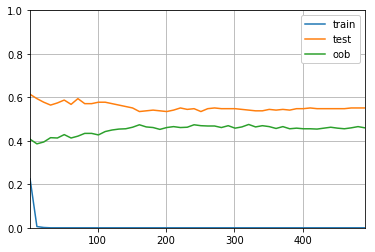

In [152]:
paint_plot(errs_train, errs_test, oobs, estimators)

In [153]:
print(estimators[errs_test.index(min(errs_test))], min(errs_test))

161 0.5346534653465347


In [154]:
d

165

Количество признаков близок к количеству деревьев при котором достигается минимум ошибки.(случайно?) 

Ошибка достаточно большая. Попробуем проделать то же самое для бинарной классификации.

In [156]:
estimators, errs_train, errs_test, oobs = \
    ensemble_exec_bin(max_estimators=1500, ens_model=ensemble.RandomForestClassifier(oob_score=True, random_state=0))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [75]:
print(estimators[errs_test.index(min(errs_test))], min(errs_test))

921 0.35313531353135313


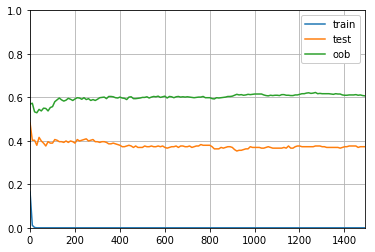

In [76]:
paint_plot(errs_train, errs_test, oobs, estimators)

Видно, что OOB при многоклассовой классификации меньше, чем при бинарной классификации(?)

## Extremely Randomized Trees

In [ ]:
estimators, errs_train, errs_test, oobs = \
    ensemble_exec(max_estimators=500, ens_model=ensemble.ExtraTreesClassifier(max_features=None, random_state=0, class_weight="balanced_subsample"))

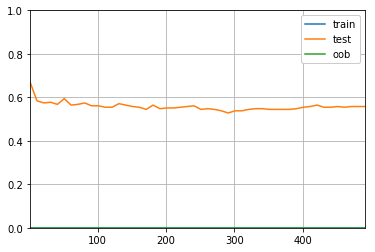

In [85]:
paint_plot(errs_train, errs_test, [], estimators)

In [86]:
print(estimators[errs_test.index(min(errs_test))], min(errs_test))

291 0.528052805280528


для бинарной классификации

In [ ]:
estimators, errs_train, errs_test, _ = \
    ensemble_exec_bin(max_estimators=1500, ens_model=ensemble.ExtraTreesClassifier(random_state=0))

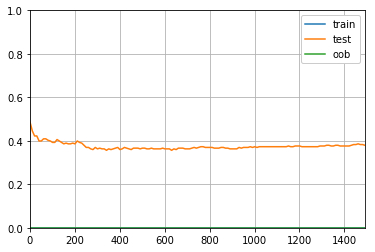

In [91]:
paint_plot(errs_train, errs_test, [], estimators)

In [89]:
print(estimators[errs_test.index(min(errs_test))], min(errs_test))

341 0.3564356435643564


## Adaboost 

In [ ]:
estimators, errs_train, errs_test, _ = \
    ensemble_exec(max_estimators=2000, step=50, ens_model=ensemble.AdaBoostClassifier(random_state=0))

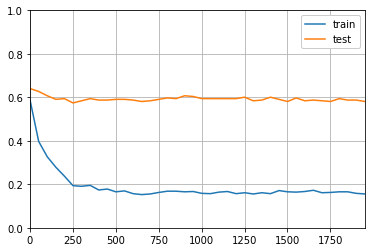

In [114]:
paint_plot(errs_train, errs_test, [], estimators)

In [115]:
print(estimators[errs_test.index(min(errs_test))], min(errs_test))

251 0.5742574257425742


In [ ]:
estimators, errs_train, errs_test, _ = \
    ensemble_exec_bin(max_estimators=1500, step=10, ens_model=ensemble.AdaBoostClassifier(random_state=0))

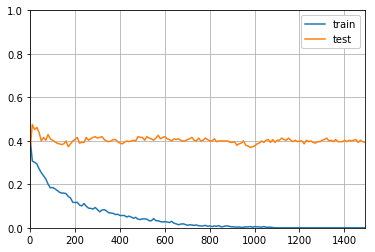

In [99]:
paint_plot(errs_train, errs_test, [], estimators)

In [112]:
print(estimators[errs_test.index(min(errs_test[1:]))], min(errs_test))

981 0.35973597359735976


## Gradient boosted trees

In [ ]:
estimators, errs_train, errs_test, _ = \
    ensemble_exec(max_estimators=2000, step=50, ens_model=ensemble.GradientBoostingClassifier(random_state=0))

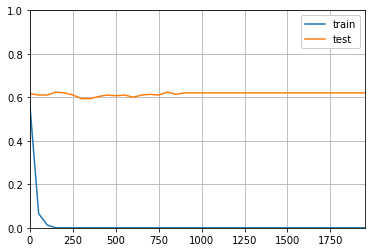

In [118]:
paint_plot(errs_train, errs_test, [], estimators)

In [120]:
print(estimators[errs_test.index(min(errs_test))], min(errs_test))

301 0.594059405940594


In [157]:
estimators, errs_train, errs_test, _ = \
    ensemble_exec_bin(max_estimators=2000, step=50, ens_model=ensemble.GradientBoostingClassifier(random_state=0))

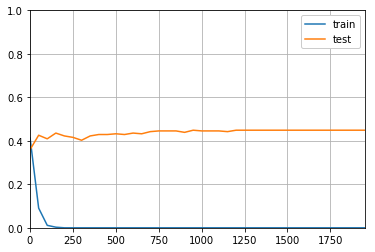

In [158]:
paint_plot(errs_train, errs_test, [], estimators)

In [160]:
print(estimators[errs_test.index(min(errs_test[1:]))], min(errs_test))

301 0.35973597359735976


## Вывод по методам ансамблей решающих правил

По полученным данным, можно сделать вывод, что методы ансамблей решающих правил для задач классификации работают примерно одинаково. Наименьшие ошибки первого рода при определенных параметрах получались для многоклассовой классификации в пределе [52, 59], для бинарной ошибки примерны равны ~35%.

# PCA

In [161]:
from sklearn.decomposition import PCA

In [166]:
X.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Lying_everytime it suits me,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Internet usage_few hours a day,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all,Education_college/bachelor degree,Education_currently a primary school pupil,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Gender,Left - right handed,Only child,Village - town,House - block of flats
0,0.403073,-0.393315,-0.952583,-1.132765,-0.114366,-0.766238,-1.399112,1.316116,1.046687,-0.992198,-1.120246,-1.391805,-1.463433,-1.404249,-0.114024,-1.362839,-1.393788,-1.012756,-0.962897,0.554127,0.855454,-1.155860,0.646837,0.421281,0.676887,-1.600245,1.058830,0.994428,-0.572506,-0.990621,-1.244992,-1.748336,1.483652,-1.232698,0.493361,0.763618,0.897541,-0.102926,1.754576,0.245203,0.609997,-0.106211,-0.064377,1.072316,0.352939,-1.011579,-1.17385,-1.202673,-0.965484,1.099462,0.372537,0.447207,0.080855,-1.707246,1.138993,2.640254,-1.072723,0.563266,0.599987,-0.776261,0.598434,0.741070,0.429314,-0.877500,-0.836389,-0.997533,-1.247225,-1.186256,1.313991,0.423310,-1.140197,-0.031164,-0.662213,1.035109,-0.963837,-0.531693,1.363191,0.787966,-1.244335,1.708153,0.150887,0.014323,-1.265528,-0.69564,1.515886,-1.080584,-1.066631,-0.164371,0.370817,-2.168309,-1.017946,-0.785889,-0.761233,-1.011743,0.784246,0.867713,-0.016948,0.099780,-1.395090,-2.093844,-1.528809,-1.553712,1.029016,-0.100950,-0.325546,0.326219,0.454845,-0.246877,0.425383,-0.144356,1.108981,-0.060153,1.230842,-2.285853,-1.719882,-0.446249,1.165839,1.378340,-1.480172,0.356144,1.365089,-1.617172,1.103498,0.102900,-1.219653,-0.472458,0.849351,0.227841,-0.020796,0.579771,1.493842,-0.169293,-0.088021,-1.455518,-0.510976,-0.152769,-1.058343,-1.339390,-0.292937,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-1.104718,0.806831,-0.952583,-1.132765,-1.045898,-1.567377,-0.605234,-0.407979,1.046687,1.195837,1.193554,-1.391805,0.188962,-1.404249,0.696989,0.871686,-0.637759,-1.012756,-0.962897,0.554127,-0.563279,-1.155860,-0.636670,-0.406528,0.6768

In [167]:
X.shape

(1010, 165)

In [163]:
pca2 = PCA(n_components=2)

In [169]:
prjX = pca2.fit_transform(X)

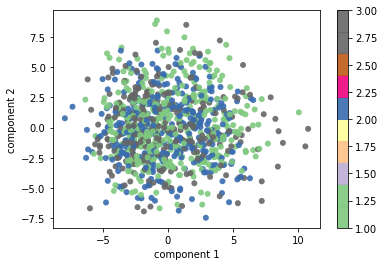

In [187]:
plt.scatter(prjX[:, 0], prjX[:, 1],
            c=y, edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

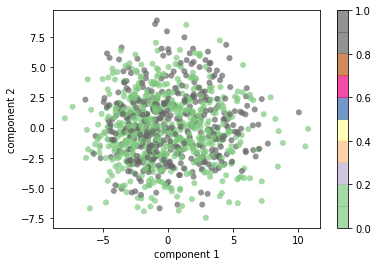

In [188]:
plt.scatter(prjX[:, 0], prjX[:, 1],
            c=y_bin, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

По крайней мере в двумерном виде видно, что ничего нормально получить в конечном счете не удастся

In [196]:
def learn_with_pca(model, max_dim: int = 165, is_bin=False, min_dim: int = 2, step:int = 10):
    dimensions = []
    errs_train = []
    errs_test = []
    targ_train = ybin_train if is_bin else y_train
    targ_test = ybin_test if is_bin else y_test
    for dim in tnrange(min_dim, max_dim, step):
        pca = PCA(n_components=dim)
        pX = pca.fit_transform(X)
        pX_train, pX_test = train_test_split(pX, test_size = 0.3, random_state = 42)
        model.fit(pX_train, targ_train)
        err_train = np.mean(targ_train != model.predict(pX_train))
        err_test  = np.mean(targ_test  != model.predict(pX_test))
        errs_train.append(err_train)
        errs_test.append(err_test)
        dimensions.append(dim)
        
    return (dimensions, errs_train, errs_test)

In [197]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(alpha = 0.08860201, hidden_layer_sizes = (190, 430),
                              solver = 'lbfgs', activation = 'logistic', random_state = 0)
dims, errs_train, errs_test = learn_with_pca(mlp_model)

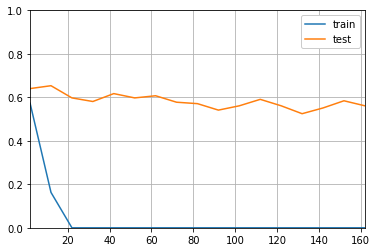

In [198]:
paint_plot(errs_train, errs_test, [], dims)

In [200]:
print(dims[errs_test.index(min(errs_test[1:]))], min(errs_test))

132 0.5247524752475248


In [201]:
dims, errs_train, errs_test = learn_with_pca(mlp_model,is_bin=True)

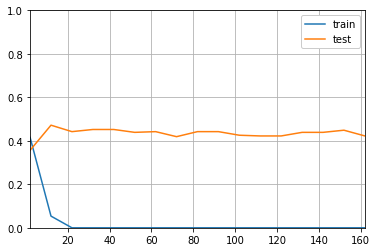

In [202]:
paint_plot(errs_train, errs_test, [], dims)

In [203]:
print(dims[errs_test.index(min(errs_test[1:]))], min(errs_test))

72 0.3564356435643564


## Выводы

Использование PCA не улучшило предыдущий результат, полученный ранее наилучшим классификатором(полносвязной нейронной сетью с найденными гиперпараметрами методом grid-search) для данной задачи 

# Keras + PCA

In [204]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adagrad

Using TensorFlow backend.


In [214]:
def learn_kearas_plus_pca(max_dim: int = 165, is_bin=False, min_dim: int = 2, step:int = 10):
    dimensions = []
    accuracy = []
    targ_train = ybin_train if is_bin else y_train
    targ_train = np.array(targ_train)
    targ_test = ybin_test if is_bin else y_test
    targ_test = np.array(targ_test)
    loss_func = 'categorical_crossentropy' if not is_bin else 'binary_crossentropy'
    output_num = 2 if not is_bin else 1
    
    if not is_bin:
        targ_train = to_categorical(targ_train)
        targ_test = to_categorical(targ_test)
    
    model = Sequential()
    model.add(Dense(190, activation='tanh'))
    model.add(Dense(430, activation='tanh'))
    model.add(Dense(output_num, activation='softmax'))
    model.compile(loss=loss_func, optimizer=Adagrad(), metrics=['accuracy'])
    
    for dim in tnrange(min_dim, max_dim, step):
        pca = PCA(n_components=dim)
        pX = pca.fit_transform(X)
        pX_train, pX_test = train_test_split(pX, test_size = 0.3, random_state = 42)
        history = model.fit(pX_train, targ_train, epochs=5, verbose=1, validation_data=(pX_test, targ_test))
        acc = history.history['val_acc'][-1]
        accuracy.append(acc)
        dimensions.append(dim)
        
    return (dimensions, accuracy)

[2, 162, 0, 1]

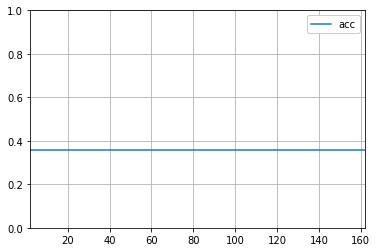

In [230]:
plt.plot(dimensions, accuracy, label='acc')
plt.grid(True)
plt.legend(loc = 'best', framealpha = 1)
plt.axis([min(dimensions), max(dimensions), 0, 1])

продолжение следует...